# Problem Statement 
    Find publicly available data for key *supply-demand* factors that influence US home prices *nationally*. Then, build a data science model that explains how these factors impacted home prices over the last 20 years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices: fred.stlouisfed.org/series/CSUSHPISA.

1) Import Dependencies

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [31]:
# getting the realtor_data about house prices nd specifictions

df = pd.read_csv("realtor-data.csv")


# now we have to clean the data and change the format on certain features for better deduction of the features for our model and also mapping it against Schiller home price index

In [32]:
null_counts = df.isnull().sum()
print(null_counts)

status                 0
bed                55924
bath               54682
acre_lot           66123
city                  52
state                  0
zip_code             197
house_size         53443
prev_sold_date    196411
price                  0
dtype: int64


In [33]:
df = df.dropna()
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date']).dt.to_period('M')
df.rename(columns={'price': 'OldsellingPrice'}, inplace=True)

In [34]:
#checking the index feature we have to map against

index = pd.read_csv('index.csv')
index['DATE'] = pd.to_datetime(index['DATE']).dt.to_period('M')
index.tail(10)

#The index this year

,DATE,CSUSHPISA
425,2022-06,305.163
426,2022-07,304.044
427,2022-08,301.712
428,2022-09,299.412
429,2022-10,298.793
430,2022-11,297.985
431,2022-12,296.952
432,2023-01,296.064
433,2023-02,296.926
434,2023-03,298.166


In [35]:
# The index at the beginning
index.head(10)

,DATE,CSUSHPISA
0,1987-01,63.964
1,1987-02,64.424
2,1987-03,64.735
3,1987-04,65.131
4,1987-05,65.564
5,1987-06,66.071
6,1987-07,66.507
7,1987-08,66.937
8,1987-09,67.329
9,1987-10,67.737


# getting the income stats to be incorporated to the dataframe

In [36]:
income = pd.read_excel("income.xlsx")

# cleaning the data and merging it with the dataframe

In [37]:
income = income.drop(columns=['id', 'State_Code', 'County',  'Place',
        'Primary', 'Zip_Code', 'Area_Code', 'Lat',
       'Lon'],axis=1)

renamed_columns = {'City':'city','State_Name':'state'}
income = income.rename(columns=renamed_columns)

column_order = ['State_ab', 'city', 'state', 'Type', 'ALand', 'AWater', 'Mean',
       'Median', 'Stdev', 'sum_w']

income = income[column_order]



# merging the dataframes

In [38]:
merged_df = df.merge(income , left_on= ['city','state'],right_on=['city','state'],how='left')
selected_features = ['State_ab', 'Type', 'ALand', 'AWater', 'Mean',
       'Median', 'Stdev', 'sum_w']

for feature in selected_features:
    df[feature] = merged_df[feature]

rerranged_columns = ['status', 'bed', 'bath', 'acre_lot', 'city', 'state','ALand', 'AWater', 'zip_code',
       'house_size',  'State_ab', 'Type',
        'Mean', 'Median', 'Stdev', 'sum_w','prev_sold_date', 'OldsellingPrice']

df = df[rerranged_columns]   

In [39]:
null_counts = df.isnull().sum()
print(null_counts)

status                0
bed                   0
bath                  0
acre_lot              0
city                  0
state                 0
ALand              1326
AWater             1326
zip_code              0
house_size            0
State_ab           1326
Type               1326
Mean               1326
Median             1326
Stdev              1326
sum_w              1326
prev_sold_date        0
OldsellingPrice       0
dtype: int64


In [40]:
df =df.dropna()

df.head()

,status,bed,bath,acre_lot,city,state,ALand,AWater,zip_code,house_size,State_ab,Type,Mean,Median,Stdev,sum_w,prev_sold_date,OldsellingPrice
829,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,36810.0,949.0,1192.0,MA,Track,58507.0,48258.0,47247.0,1091.221424,2019-06,110000.0
3380,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,5745207.0,0.0,949.0,1192.0,CT,Track,81277.0,77849.0,52697.0,406.038436,2019-06,110000.0
5083,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,36810.0,949.0,1192.0,MA,Track,58507.0,48258.0,47247.0,1091.221424,2019-06,110000.0
5387,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,1678138.0,229666.0,949.0,1192.0,MA,Track,16468.0,17561.0,10634.0,37.330667,2019-06,110000.0
9053,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,1258340.0,0.0,949.0,1192.0,MA,Track,46149.0,38639.0,39421.0,355.739179,2019-06,110000.0


# applying the index
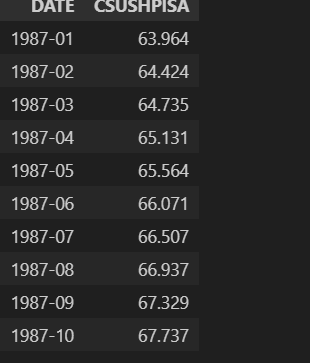




# The features taken into considerations

    1) The CSUSHPISA "schuler price index" is mapped with the respective houses in the dataframe maping the prev sold date with DATE
    2) The latest price_index is  = 298.166  as of 2023-03-01	as last date (as per our information)

In [41]:
merged_df = df.merge(index, left_on='prev_sold_date', right_on='DATE', how='left')

In [42]:
merged_df.head()

,status,bed,bath,acre_lot,city,state,ALand,AWater,zip_code,house_size,State_ab,Type,Mean,Median,Stdev,sum_w,prev_sold_date,OldsellingPrice,DATE,CSUSHPISA
0,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,36810.0,949.0,1192.0,MA,Track,58507.0,48258.0,47247.0,1091.221424,2019-06,110000.0,2019-06,208.701
1,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,5745207.0,0.0,949.0,1192.0,CT,Track,81277.0,77849.0,52697.0,406.038436,2019-06,110000.0,2019-06,208.701
2,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,36810.0,949.0,1192.0,MA,Track,58507.0,48258.0,47247.0,1091.221424,2019-06,110000.0,2019-06,208.701
3,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,1678138.0,229666.0,949.0,1192.0,MA,Track,16468.0,17561.0,10634.0,37.330667,2019-06,110000.0,2019-06,208.701
4,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,1258340.0,0.0,949.0,1192.0,MA,Track,46149.0,38639.0,39421.0,355.739179,2019-06,110000.0,2019-06,208.701


#     Set the latest index value:latest_index
    The latest_index_value represents the current value of the price index.

    Convert the 'DATE' column to a pandas datetime object if needed:
    If the 'DATE' column in the second DataFrame is not already in the datetime format, it can be converted to a pandas datetime object using the pd.to_datetime() function. This allows for easier handling and manipulation of dates in subsequent calculations.

    Merge the two DataFrames on the corresponding dates:
    The two DataFrames, df1 and df2, are merged based on the common column 'prev_sold_date' in df and 'DATE' in index. This merging of DataFrames brings the relevant price index information into the larger DataFrame.

    Calculate the percentage change in the price index:
    The percentage change in the price index is calculated using the formula: percentage_change = (latest_index_value - CSUSHPISA) / CSUSHPISA

    Here, latest_index_value is the current value of the price index, and CSUSHPISA represents the historical values of the price index.

    Calculate the new selling price by multiplying the old selling price with the percentage change:
    The new selling price is calculated by multiplying the old selling price with the sum of 1 and the percentage change. 
    The formula is: new_selling_price = OldsellingPrice * (1 + percentage_change)

    Here, OldsellingPrice represents the original selling price of the house.

    Round the new selling price to 2 decimal places:
    The new selling price can be rounded to 2 decimal places to improve readability and consistency.


In [43]:
latest_index = 298.166
merged_df['percentage_change'] = (latest_index - merged_df['CSUSHPISA']) / merged_df['CSUSHPISA']
merged_df['new_selling_price'] = merged_df['OldsellingPrice'] * (1 + merged_df['percentage_change'])
merged_df['new_selling_price'] = merged_df['new_selling_price'].round(2)


In [44]:
merged_df = merged_df.drop(columns=['DATE','zip_code'],axis=1)

# checking the distrubution of house prices

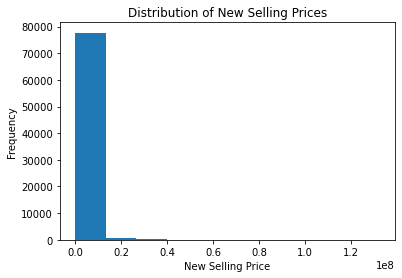

In [46]:
# Plot a histogram of the new selling prices
plt.hist(merged_df['new_selling_price'], bins=10)
plt.xlabel('New Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of New Selling Prices')
plt.show()

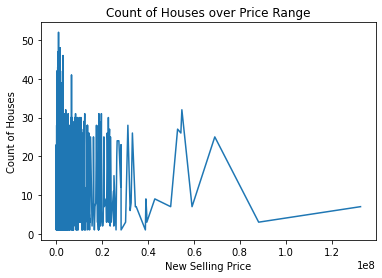

In [47]:
# Calculate the count of houses for each price
price_counts = merged_df['new_selling_price'].value_counts().sort_index()

# Create a line graph
price_counts.plot(kind='line')

# Customize the plot
plt.xlabel('New Selling Price')
plt.ylabel('Count of Houses')
plt.title('Count of Houses over Price Range')

# Show the plot
plt.show()

# now assumptions are to be made about the prone to natural calamity

In [49]:


num_rows = len(merged_df)
num_positive = int(0.6 * num_rows)  # 60% of the total rows

# Generate random values for the prone_to_natural_disasters column
values = [1] * num_positive + [0] * (num_rows - num_positive)
np.random.shuffle(values)
merged_df['prone_to_natural_disasters'] = values

merged_df['prone_to_natural_disasters'] = merged_df['city'].map(merged_df.groupby('city')['city'].apply(lambda x: np.random.randint(2)))

In [54]:
rearranged_columns = ['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'ALand', 'AWater',
       'house_size', 'State_ab', 'Type', 'Mean', 'Median', 'Stdev', 'sum_w','prone_to_natural_disasters',
       'prev_sold_date', 'OldsellingPrice', 'CSUSHPISA', 'percentage_change',
       'new_selling_price']

merged_df = merged_df[rearranged_columns]

In [56]:
merged_df.to_csv("Model_data.csv")

# The improved dataset is all ready for implementing our machine learning model